## H2O SHAP

In [61]:
import h2o
h2o.init()

# Import wine quality dataset
f = "https://h2o-public-test-data.s3.amazonaws.com/smalldata/wine/winequality-redwhite-no-BOM.csv"
df = h2o.import_file("https://h2o-public-test-data.s3.amazonaws.com/smalldata/wine/winequality-redwhite-no-BOM.csv")

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,2 hours 32 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.34.0.1
H2O_cluster_version_age:,2 months and 9 days
H2O_cluster_name:,H2O_from_python_datas_ofgfow
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.956 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [62]:
df.describe()

Rows:6497
Cols:13




,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
type,real,real,real,real,real,real,real,real,real,real,real,int,enum
mins,3.8,0.08,0.0,0.6,0.009,1.0,6.0,0.98711,2.72,0.22,8.0,3.0,
mean,7.215307064799138,0.33966599969216565,0.31863321533015243,5.443235339387409,0.05603386178236108,30.52531937817455,115.7445744189626,0.994696633830999,3.2185008465445586,0.5312682776666153,10.491800831149456,5.818377712790519,
maxs,15.9,1.58,1.66,65.8,0.611,289.0,440.0,1.03898,4.01,2.0,14.9,9.0,
sigma,1.2964337577998157,0.1646364740846788,0.14531786489759152,4.757803743147418,0.03503360137245907,17.7493997720025,56.5218545226303,0.002998673003719035,0.16078720210398753,0.14880587361449027,1.1927117488689818,0.8732552715311248,
zeros,0,0,151,0,0,0,0,0,0,0,0,0,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8,6.0,white
1,6.3,0.3,0.34,1.6,0.049,14.0,132.0,0.994,3.3,0.49,9.5,6.0,white
2,8.1,0.28,0.4,6.9,0.05,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,white


In [8]:
df.columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality',
 'type']

In [63]:
# Reponse column
y = "quality"
x = ['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',]
# Split into train & test
splits = df.split_frame(ratios = [0.8], seed = 1)
train = splits[0]
test = splits[1]


In [55]:
from h2o.estimators import H2ORandomForestEstimator
# Build and train the model:
rf = H2ORandomForestEstimator(ntrees=100,max_depth=6, min_rows=10)
rf.train(x=x, y=y, training_frame=train, validation_frame=test)

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Model Details
H2ORandomForestEstimator :  Distributed Random Forest
Model Key:  DRF_model_python_1637768638966_3


Model Summary: 


,,number_of_trees,number_of_internal_trees,model_size_in_bytes,min_depth,max_depth,mean_depth,min_leaves,max_leaves,mean_leaves
0,,100.0,100.0,64007.0,6.0,6.0,6.0,34.0,55.0,46.29




ModelMetricsRegression: drf
** Reported on train data. **

MSE: 0.5063733519881566
RMSE: 0.7115991511997162
MAE: 0.5647491877978598
RMSLE: 0.10689574470028267
Mean Residual Deviance: 0.5063733519881566

ModelMetricsRegression: drf
** Reported on validation data. **

MSE: 0.46952078236997896
RMSE: 0.6852158655270462
MAE: 0.5443005954112061
RMSLE: 0.10194126055160514
Mean Residual Deviance: 0.46952078236997896

Scoring History: 


,,timestamp,duration,number_of_trees,training_rmse,training_mae,training_deviance,validation_rmse,validation_mae,validation_deviance
0,,2021-11-24 12:50:49,0.008 sec,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,,2021-11-24 12:50:49,0.034 sec,1.0,0.773218,0.606875,0.597866,0.733458,0.573782,0.537961
2,,2021-11-24 12:50:49,0.049 sec,2.0,0.743096,0.578877,0.552192,0.707145,0.548574,0.500054
3,,2021-11-24 12:50:49,0.064 sec,3.0,0.749743,0.582553,0.562115,0.696370,0.543404,0.484932
4,,2021-11-24 12:50:49,0.079 sec,4.0,0.742655,0.580763,0.551537,0.689437,0.538135,0.475323
5,,2021-11-24 12:50:49,0.089 sec,5.0,0.738617,0.579430,0.545556,0.685343,0.537274,0.469696
6,,2021-11-24 12:50:49,0.104 sec,6.0,0.734165,0.578017,0.538999,0.686696,0.539309,0.471551
7,,2021-11-24 12:50:49,0.119 sec,7.0,0.735327,0.579857,0.540706,0.688709,0.541754,0.474319
8,,2021-11-24 12:50:49,0.129 sec,8.0,0.734915,0.579852,0.540099,0.689498,0.542566,0.475408
9,,2021-11-24 12:50:49,0.144 sec,9.0,0.734676,0.579788,0.539749,0.690094,0.542736,0.476229



See the whole table with table.as_data_frame()

Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,alcohol,32798.058594,1.000000,0.346338
1,density,15477.192383,0.471894,0.163435
2,volatile acidity,13293.426758,0.405311,0.140375
3,chlorides,8799.062500,0.268280,0.092915
4,free sulfur dioxide,4871.761230,0.148538,0.051444
5,citric acid,4610.138184,0.140561,0.048682
6,total sulfur dioxide,4128.223633,0.125868,0.043593
7,sulphates,3516.075439,0.107204,0.037129
8,residual sugar,3422.611572,0.104354,0.036142
9,pH,1912.336792,0.058306,0.020194


# Residual Analysis

> Residual Analysis plots the fitted values vs residuals on a test dataset. Ideally, residuals should be randomly distributed. Patterns in this plot can indicate potential problems with the model selection, e.g., using simpler model than necessary, not accounting for heteroscedasticity, autocorrelation, etc. Note that if you see "striped" lines of residuals, that is an artifact of having an integer valued (vs a real valued) response variable.

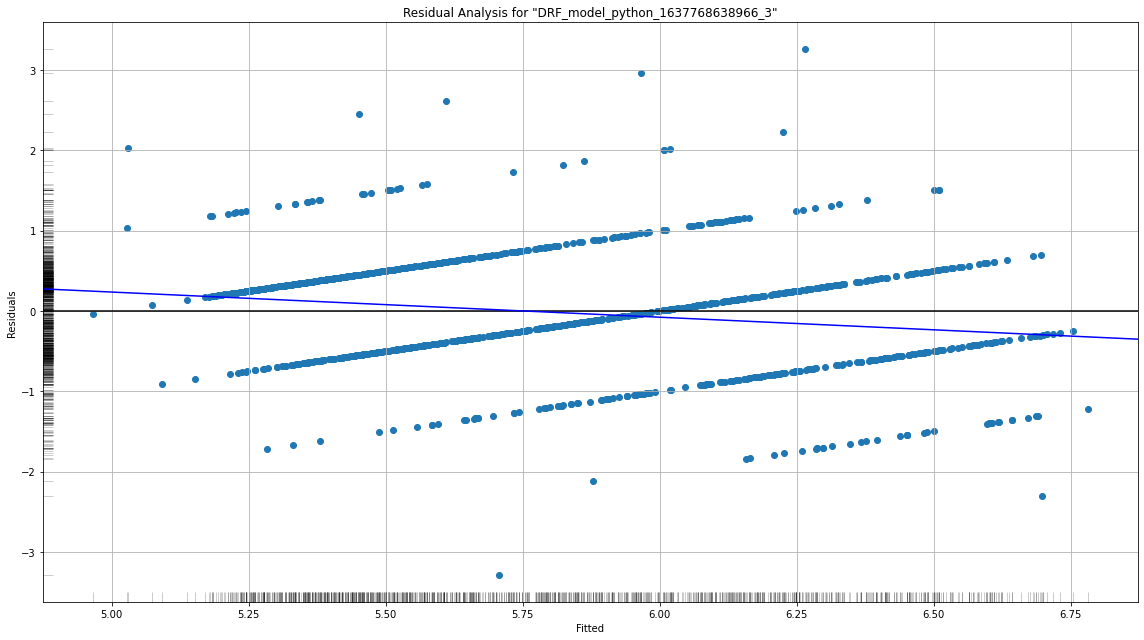

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

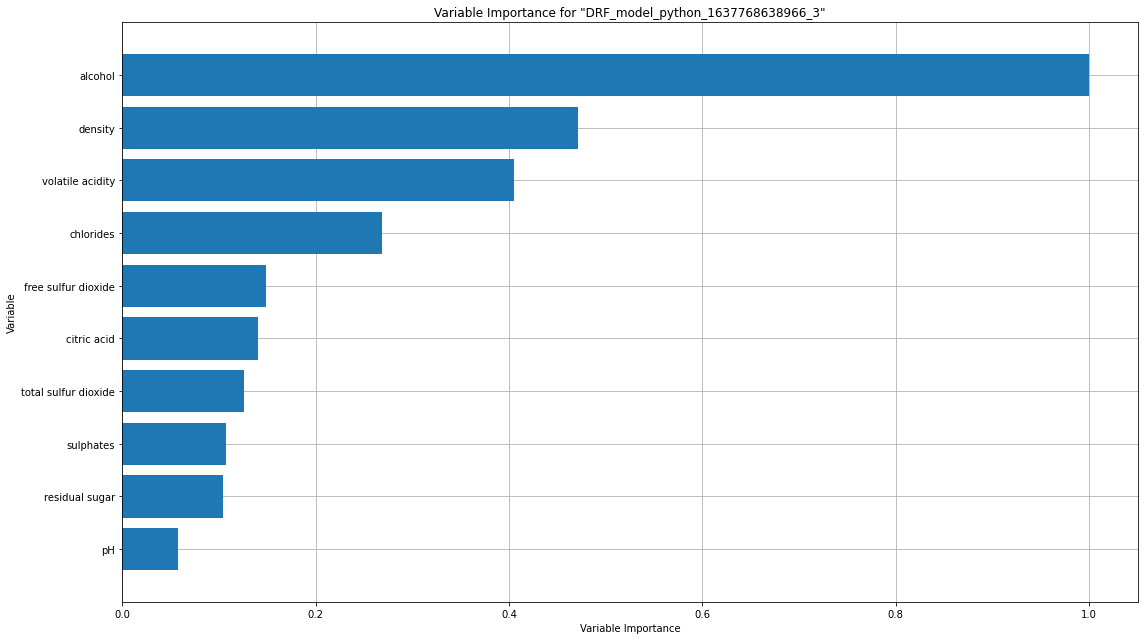

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

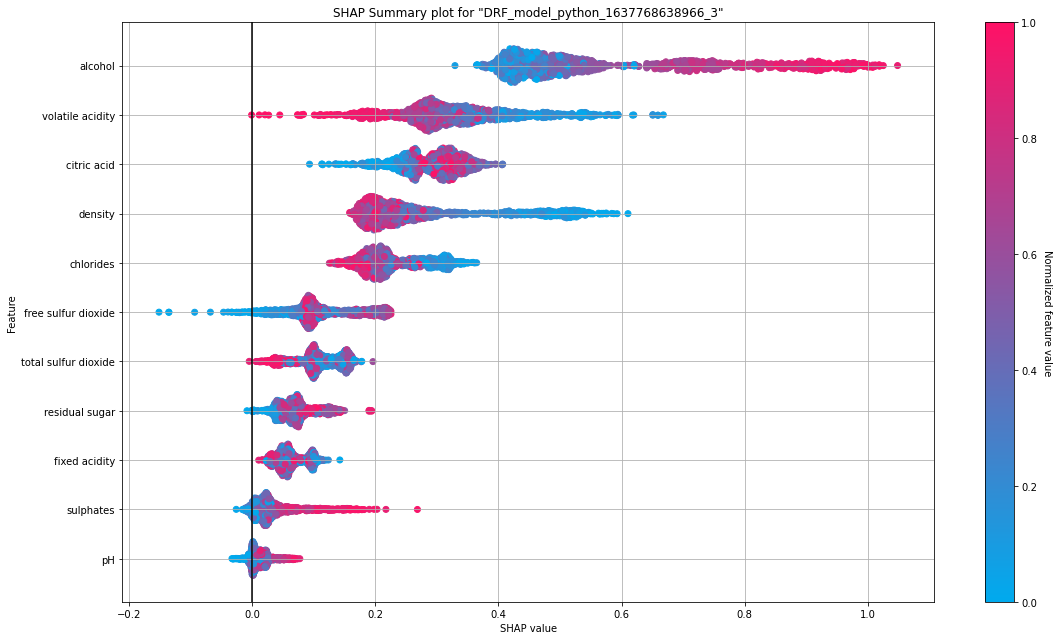

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

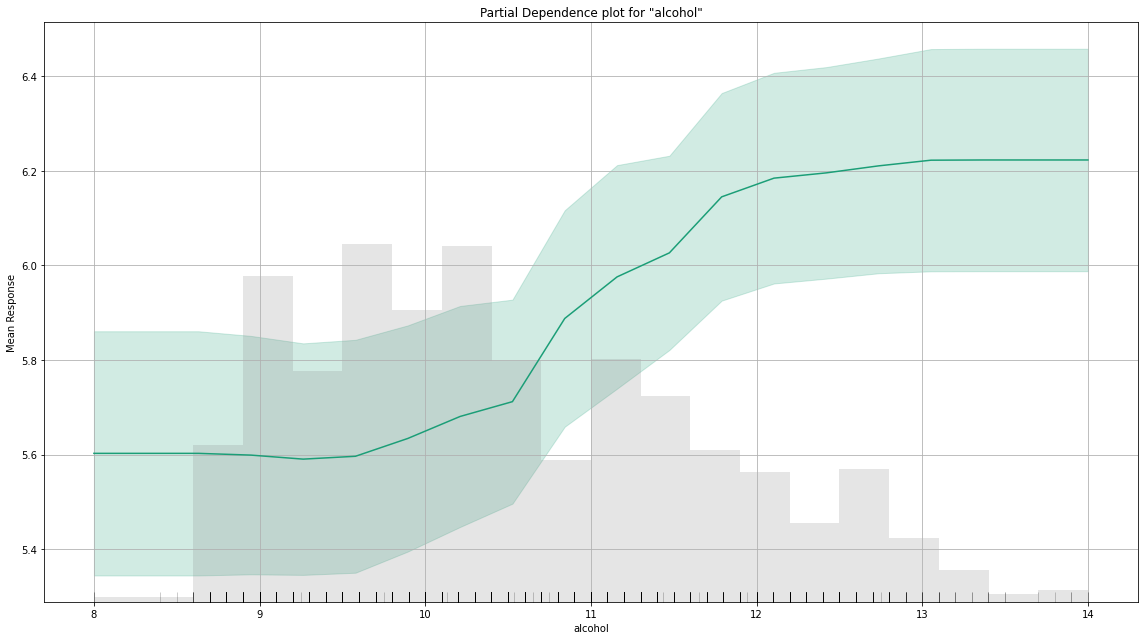

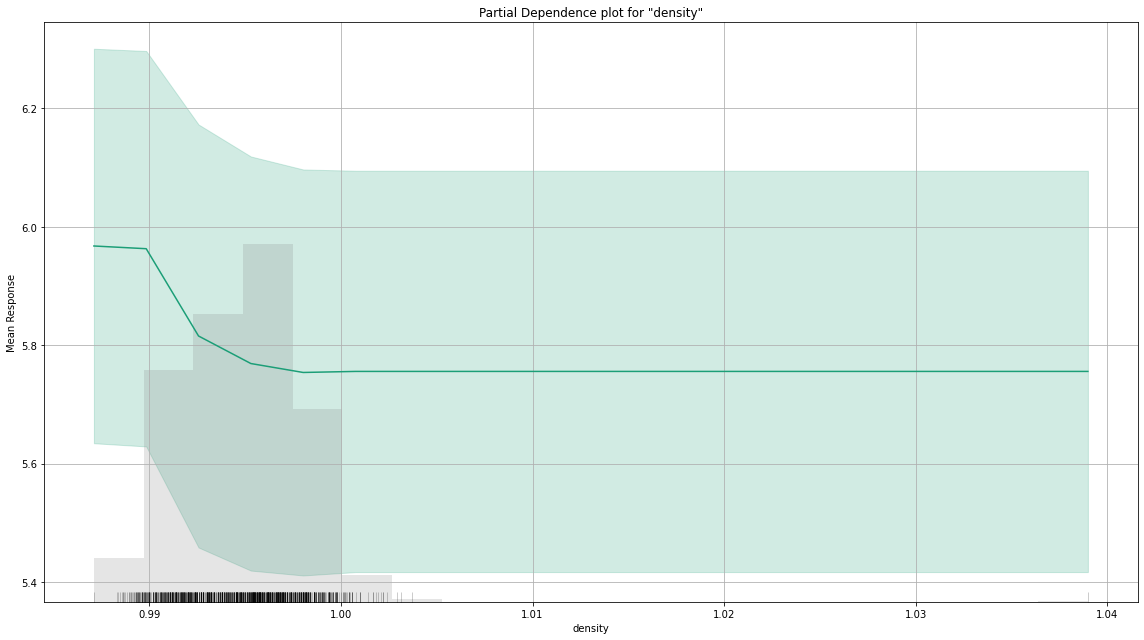

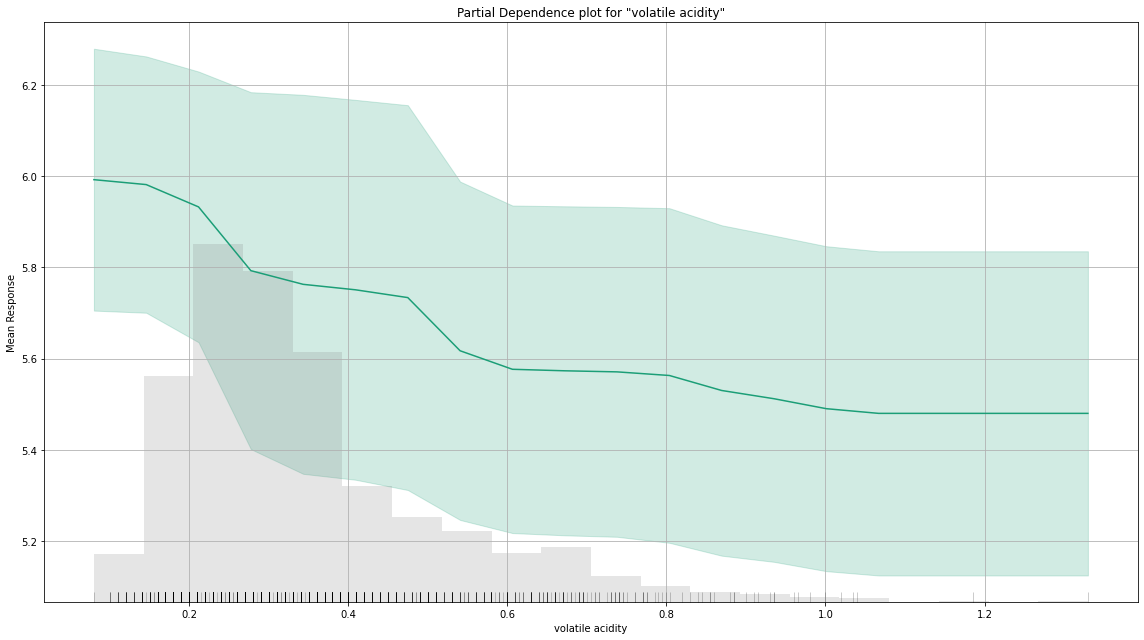

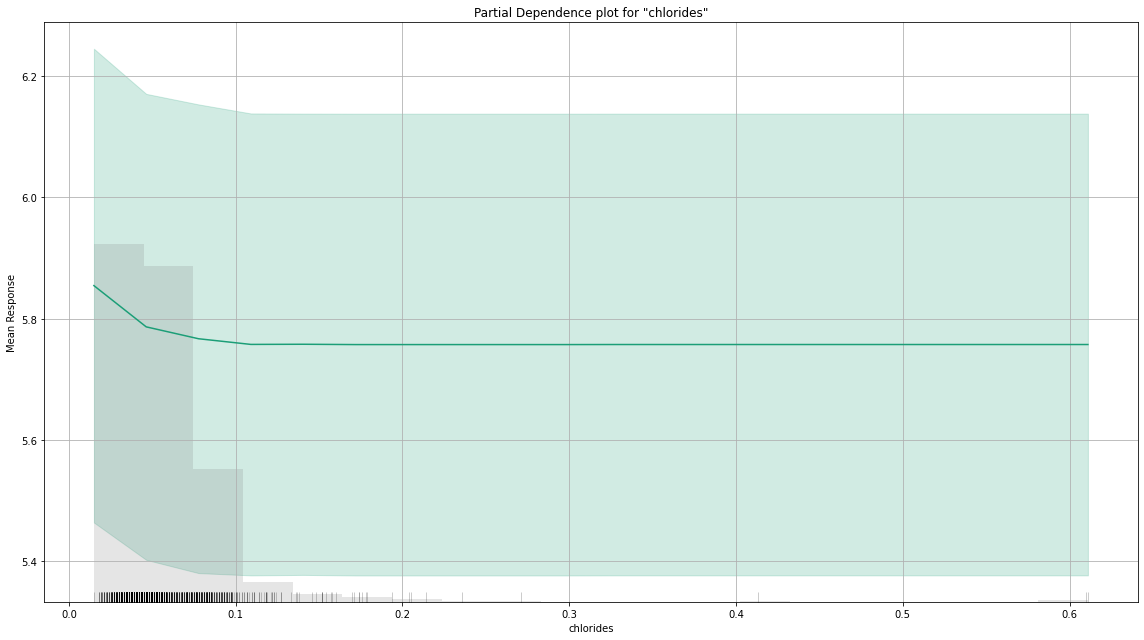

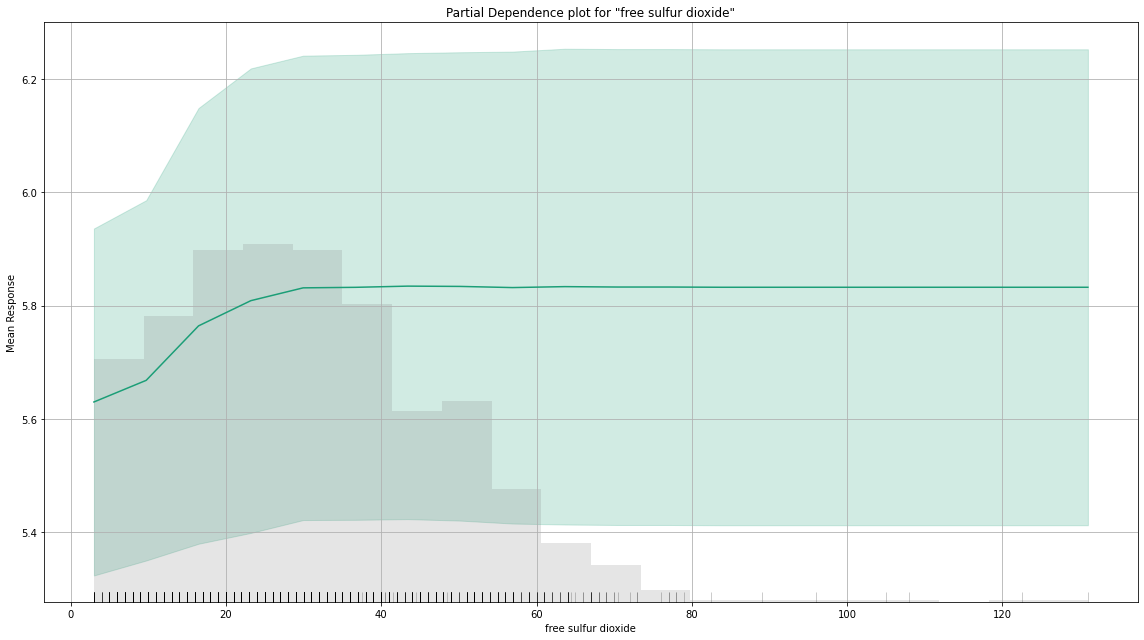

# Individual Conditional Expectation

> An Individual Conditional Expectation (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response. ICE plots are similar to partial dependence plots (PDP); PDP shows the average effect of a feature while ICE plot shows the effect for a single instance. This function will plot the effect for each decile. In contrast to the PDP, ICE plots can provide more insight, especially when there is stronger feature interaction.

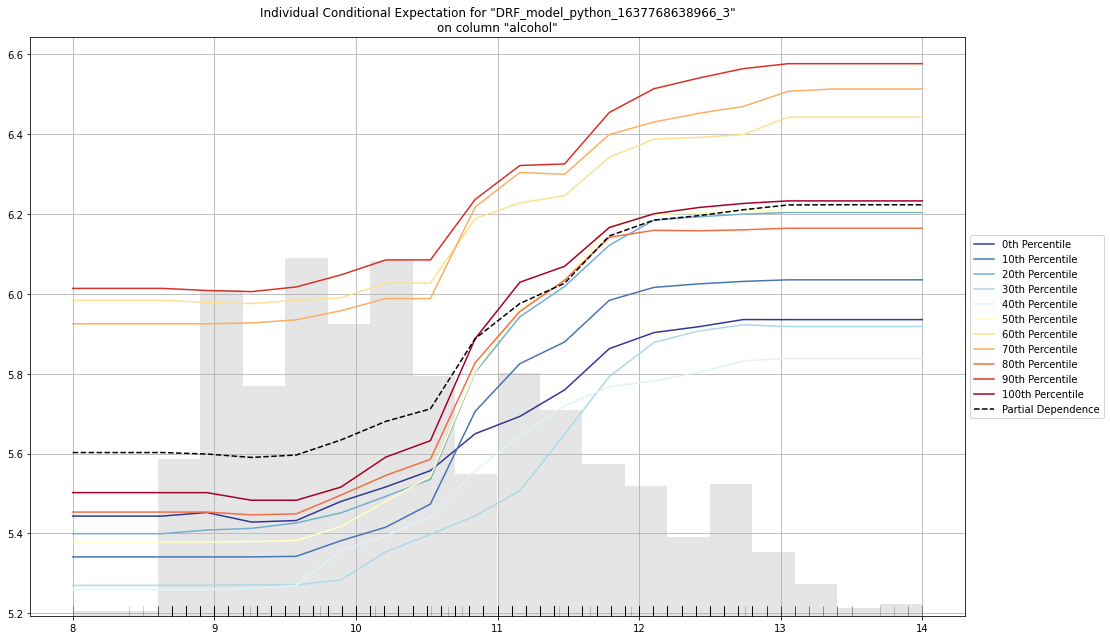

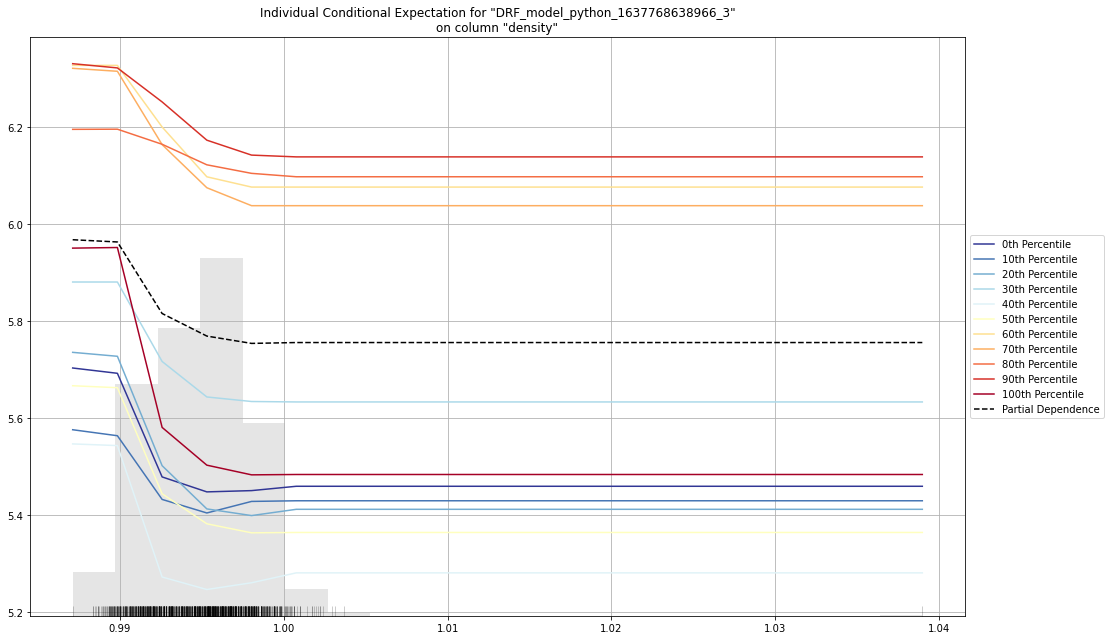

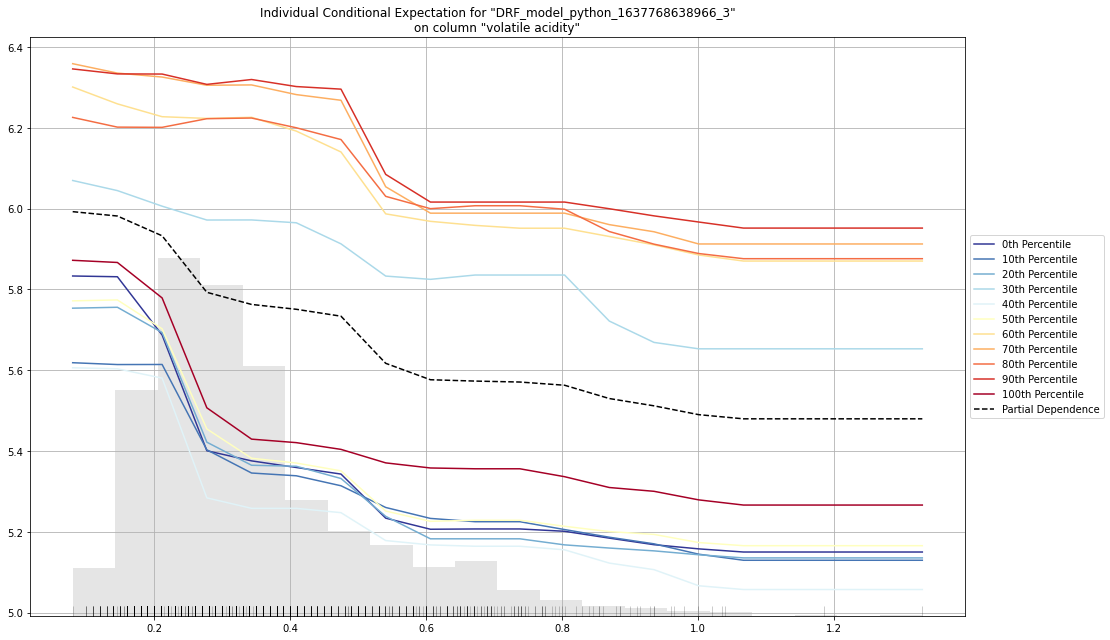

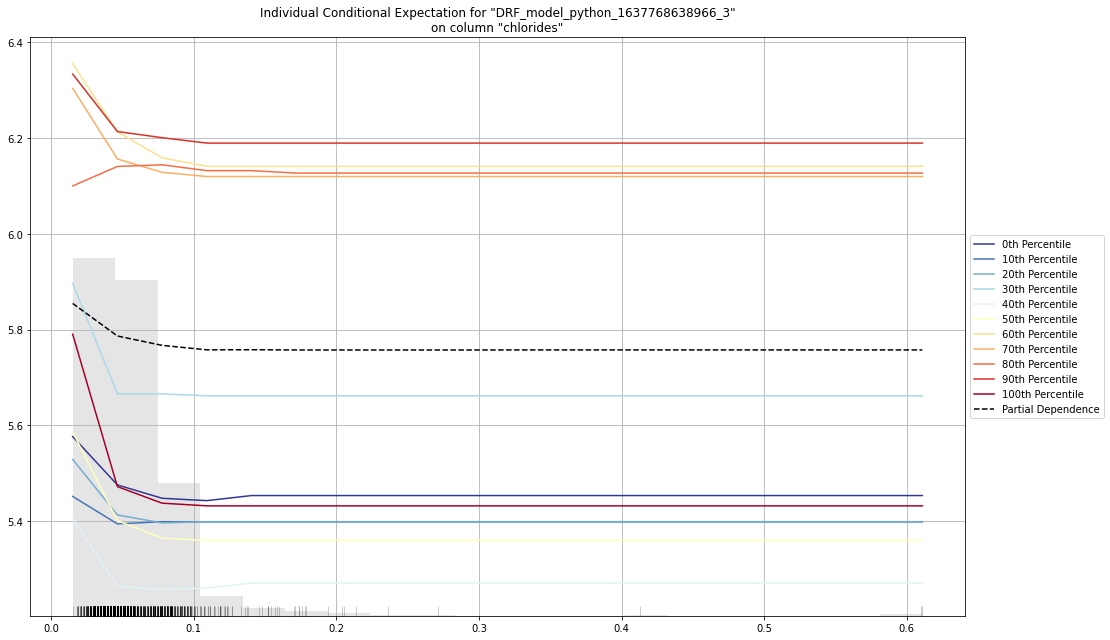

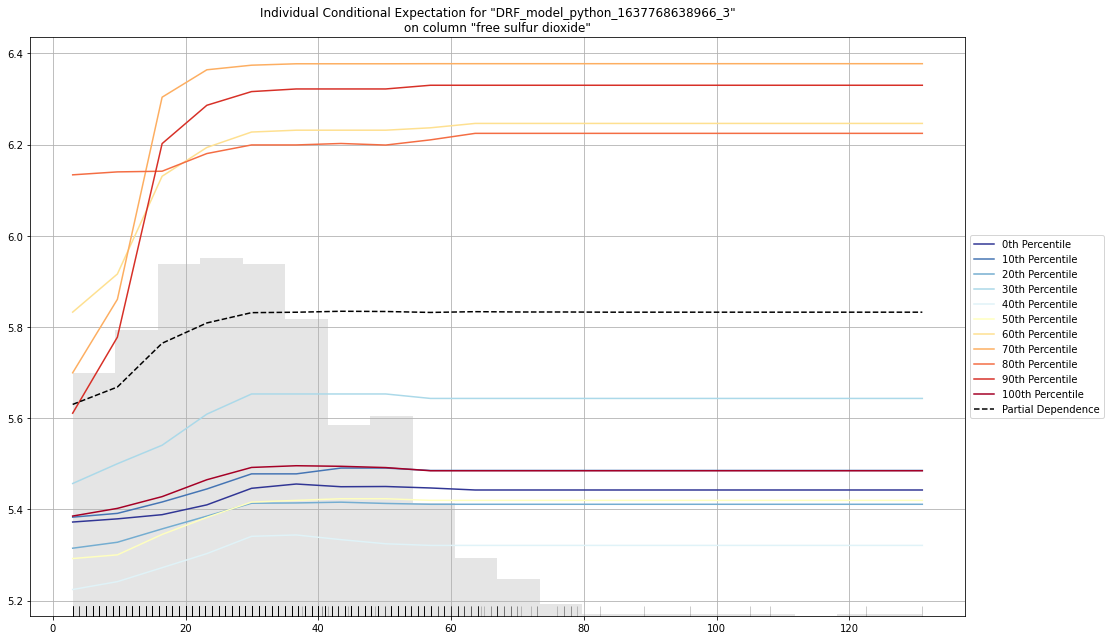

In [56]:
# Explain leader model & compare with all AutoML models
model_explain = rf.explain(test)

In [64]:
obs = test[(test['sulphates']==0.64) & 
   #(test['pH']==3.26)  &
   (test['alcohol']>10)
  ]
obs

fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
7.5,0.27,0.31,17.7,0.051,33,173,0.999,3.09,0.64,10.2,5,white
6.6,0.16,0.32,1.4,0.035,49,186,0.9906,3.35,0.64,12.4,8,white
7.1,0.3,0.36,6.8,0.055,44.5,234,0.9972,3.49,0.64,10.2,6,white
7.1,0.21,0.28,2.7,0.034,23,111,0.99405,3.35,0.64,10.2,4,white
7.1,0.21,0.28,2.7,0.034,23,111,0.99405,3.35,0.64,10.2,4,white
6.7,0.34,0.3,8.5,0.059,24,152,0.99615,3.46,0.64,11,7,white
5.9,0.28,0.39,1.4,0.031,47,147,0.98836,3.08,0.64,12.9,7,white
6.5,0.16,0.34,1.4,0.029,29,133,0.99108,3.33,0.64,11.5,7,white
6.4,0.33,0.28,4,0.04,24,81,0.9903,3.26,0.64,12.6,7,white
4.8,0.13,0.32,1.2,0.042,40,98,0.9898,3.42,0.64,11.8,7,white


# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

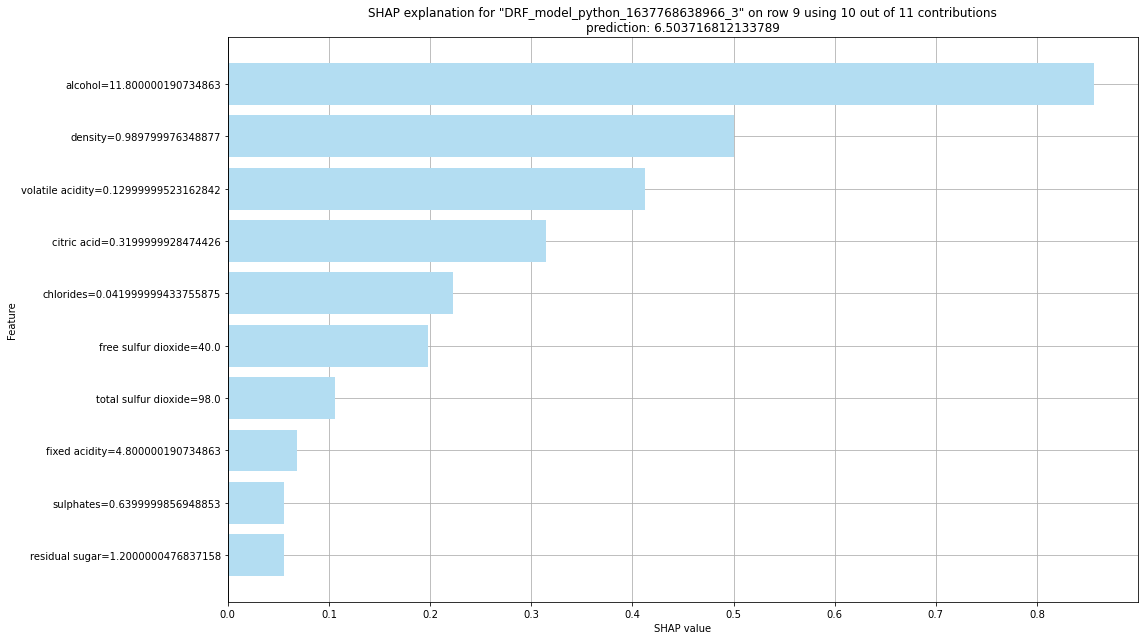

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

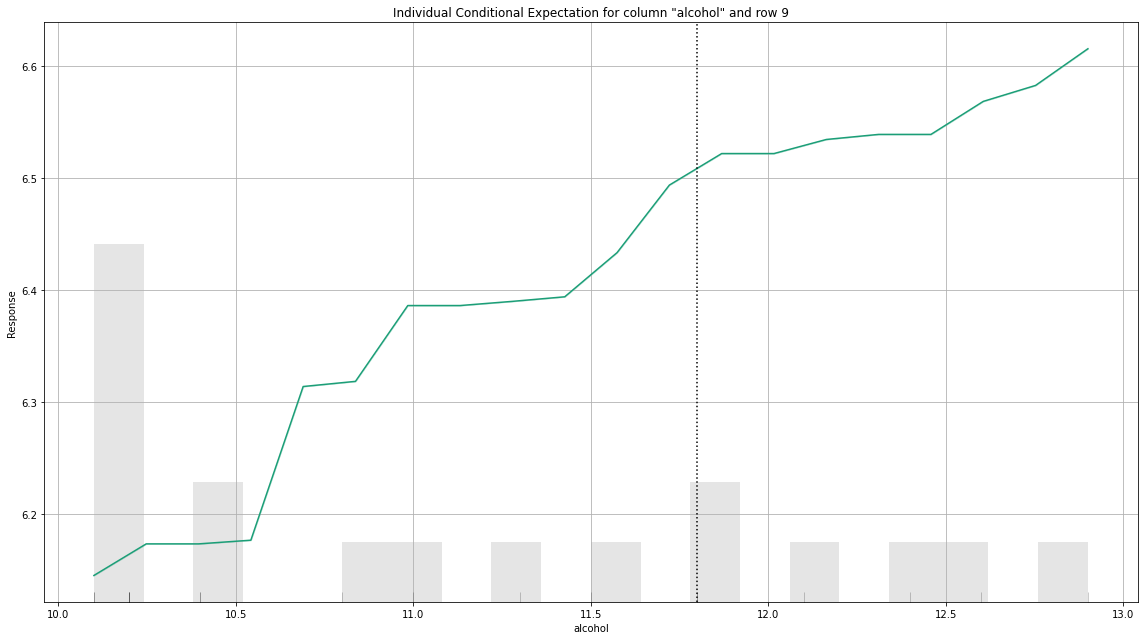

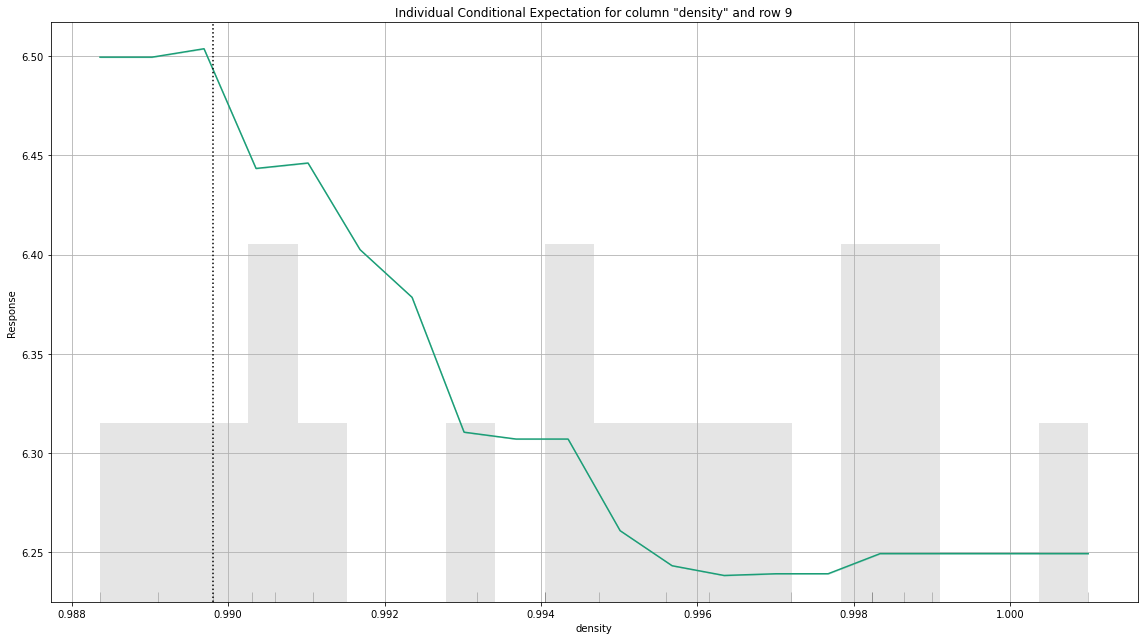

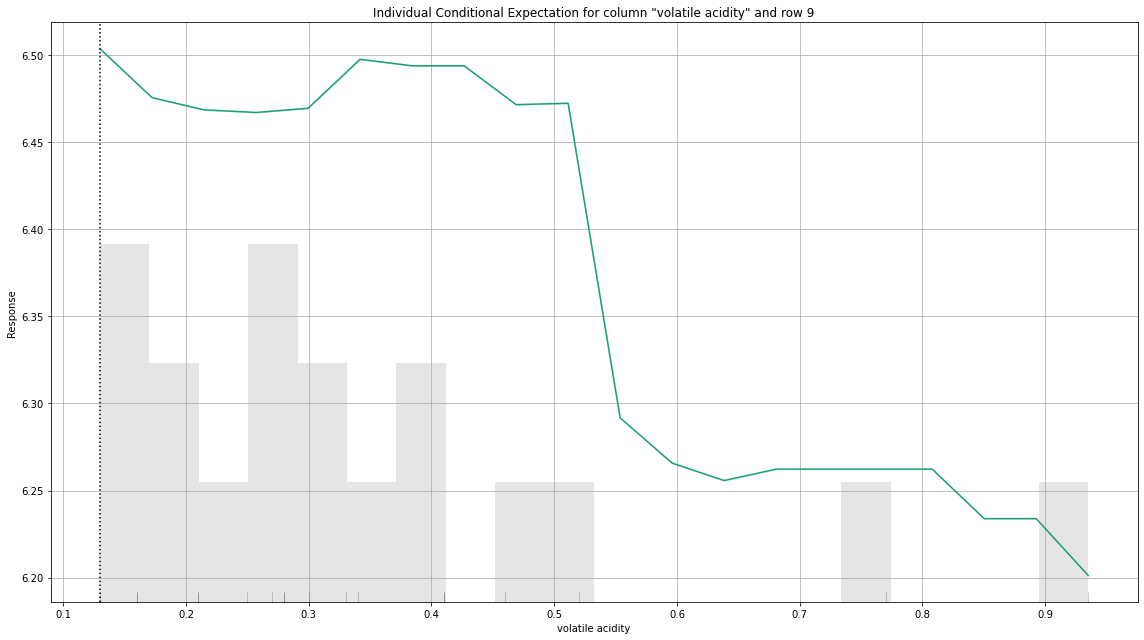

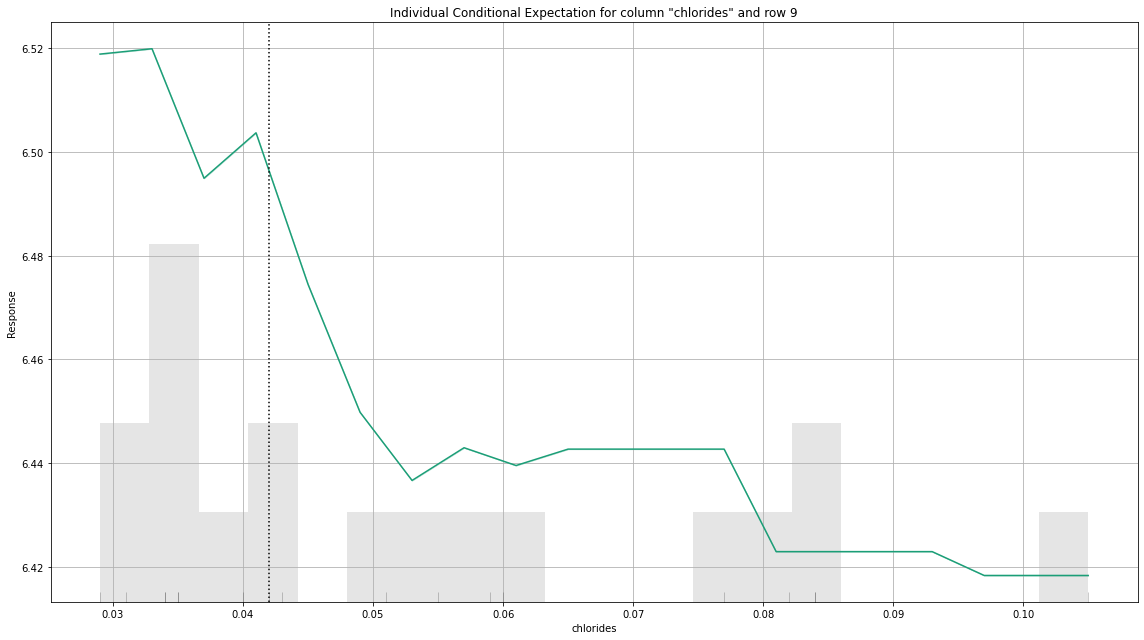

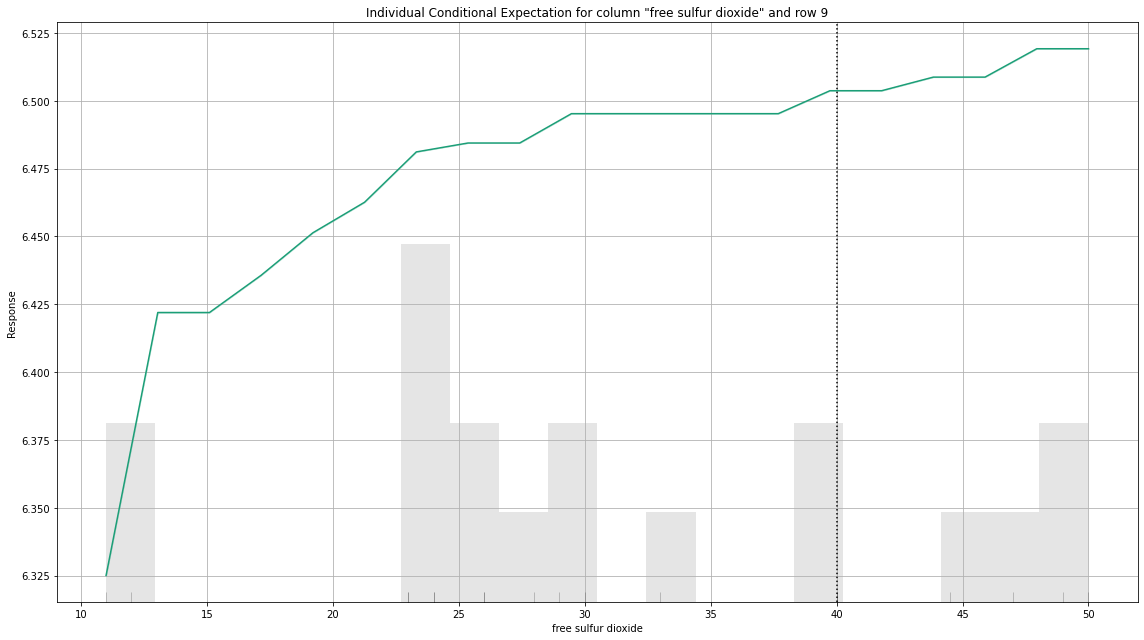

# SHAP Explanation

> SHAP explanation shows contribution of features for a given instance. The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function. H2O implements TreeSHAP which when the features are correlated, can increase contribution of a feature that had no influence on the prediction.

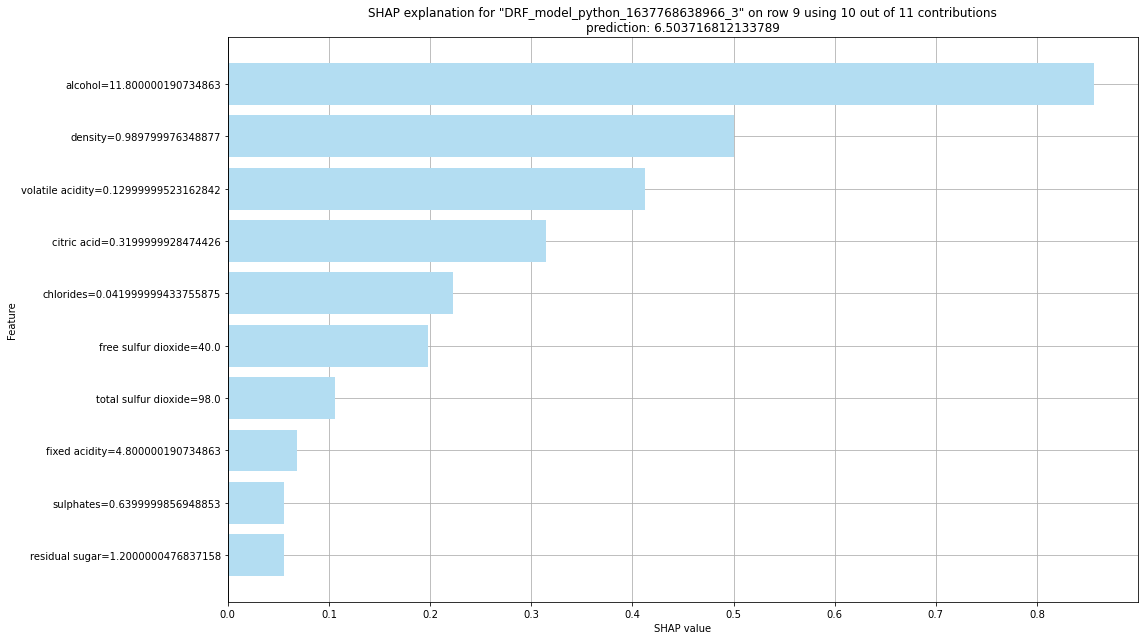

# Individual Conditional Expectation

> Individual conditional expectations (ICE) plot gives a graphical depiction of the marginal effect of a variable on the response for a given row. ICE plot is similar to partial dependence plot (PDP), PDP shows the average effect of a feature while ICE plot shows the effect for a single instance.

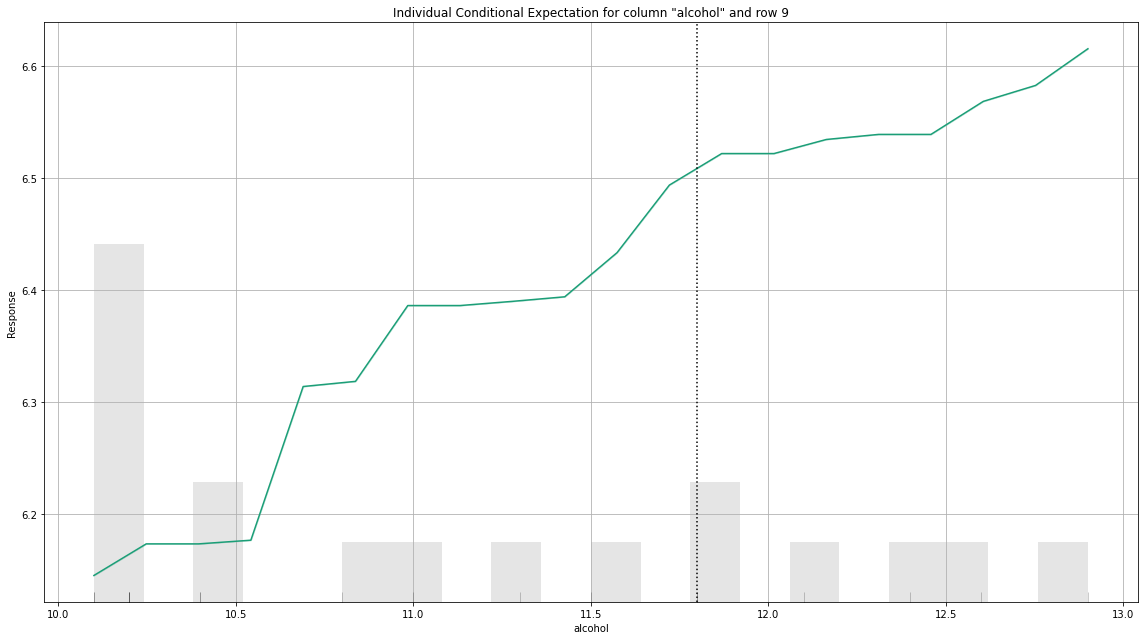

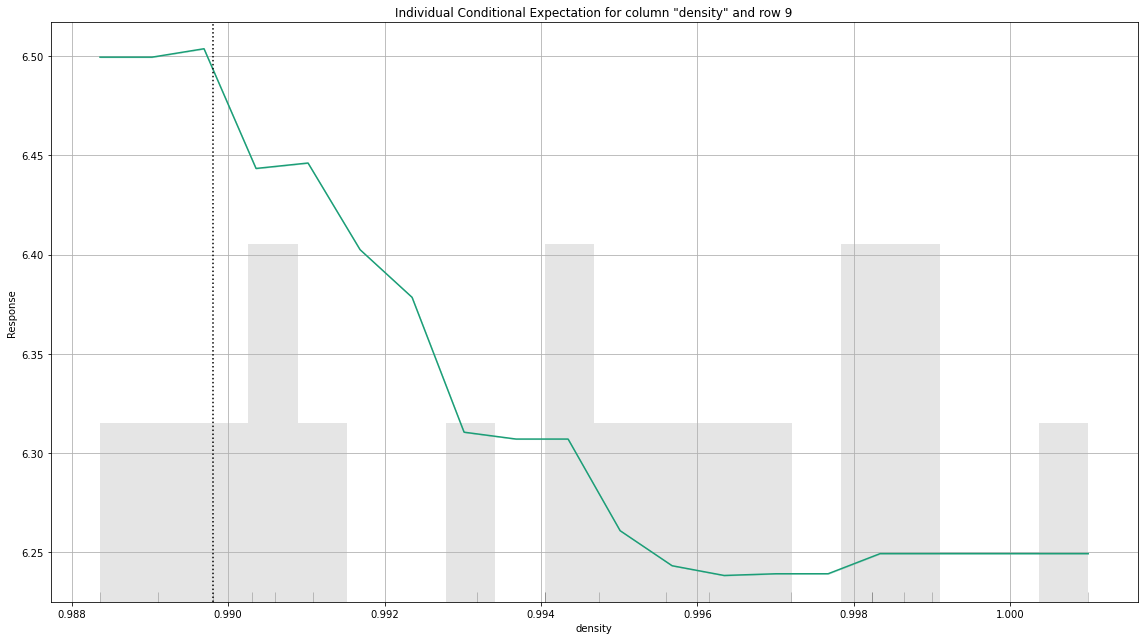

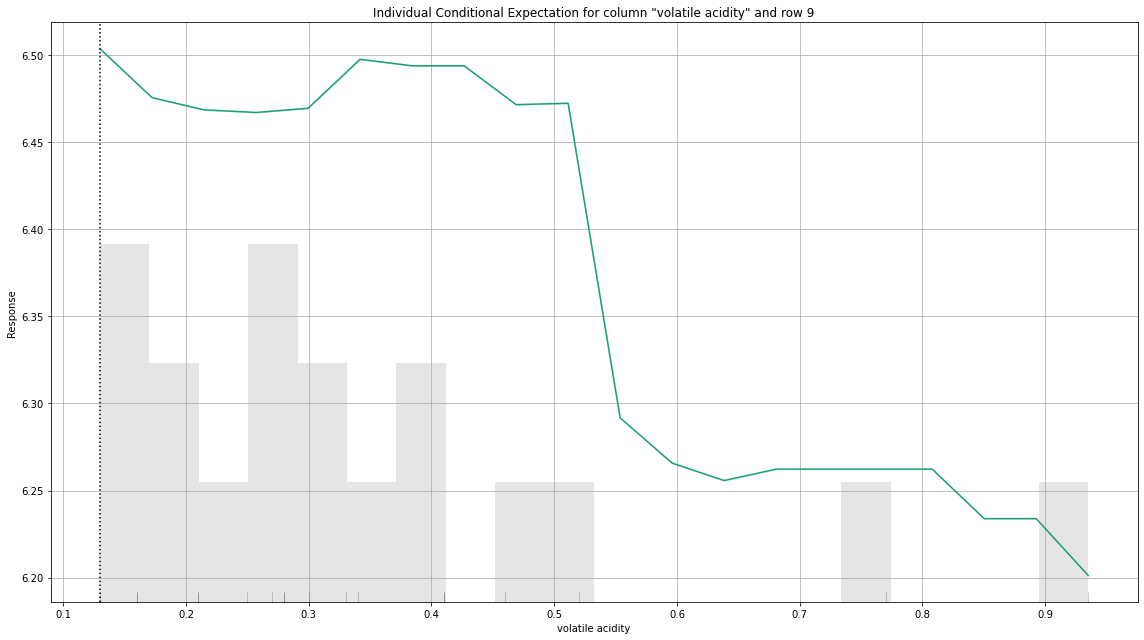

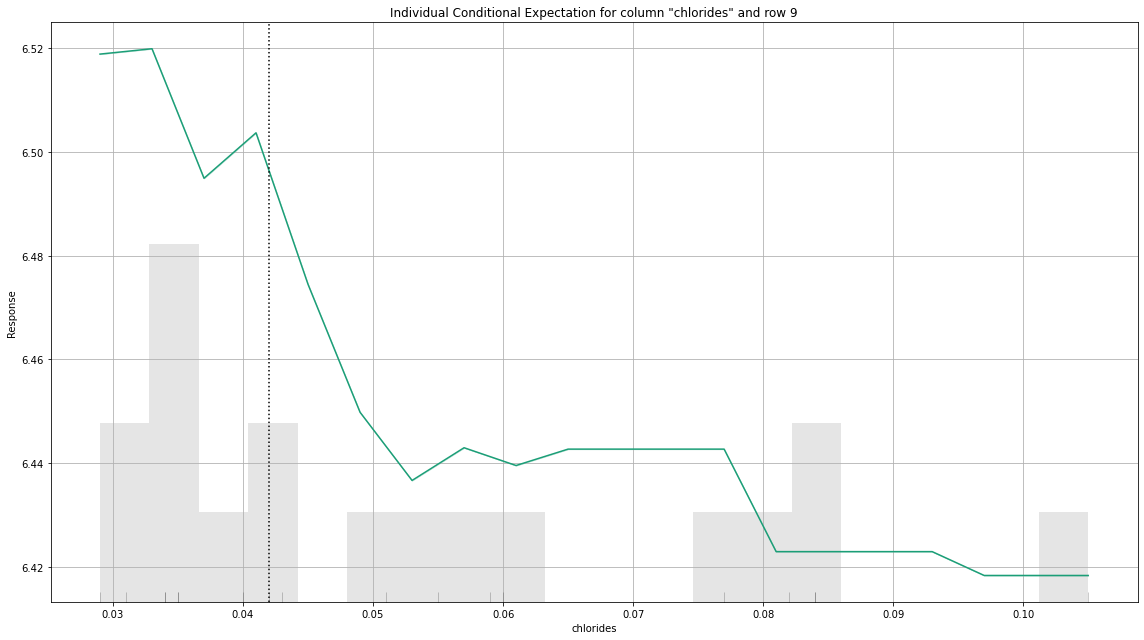

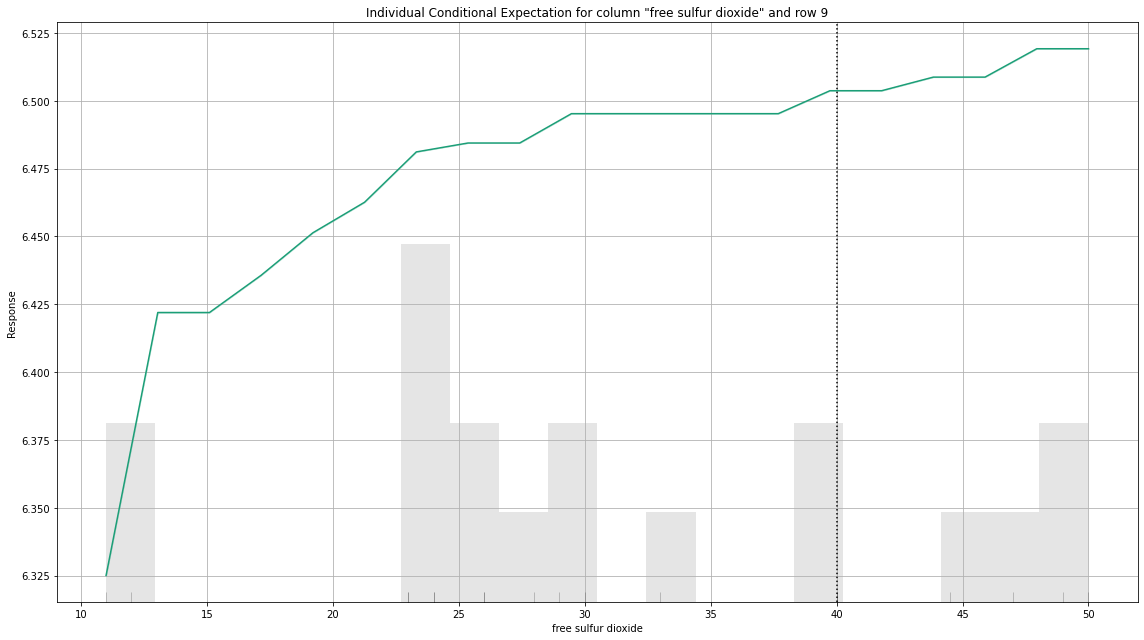

In [60]:
rf.explain_row(obs, row_index=9)